<a href="https://colab.research.google.com/github/subandwho/py/blob/master/CredtCardFraudPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('credit.csv')

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1170,912,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,...,-0.060433,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.00,0
1171,912,-0.416621,1.019731,1.337170,-0.203938,0.389846,-0.131373,0.644427,0.081807,-0.423742,...,-0.229379,-0.540069,-0.060893,-0.434687,-0.187677,0.130568,0.284018,0.113227,2.28,0
1172,914,-0.820178,1.225605,1.517290,-0.007492,0.310123,-0.936490,1.026234,-0.163058,-0.500997,...,0.032831,0.136686,-0.347711,0.390412,0.849821,-0.405567,0.074595,0.040960,11.03,0
1173,915,-0.846062,1.229172,1.199372,-0.159955,-0.100758,-0.133499,0.225048,0.610909,-0.920157,...,-0.096225,-0.330107,0.056005,0.013645,-0.249805,0.083841,0.154696,0.046125,8.99,0
1174,916,-1.436085,1.974649,0.427860,-0.405554,0.287329,-0.587761,0.677872,-0.005181,0.519908,...,-0.465827,-0.900885,-0.070394,-0.507925,0.234098,0.144470,0.762605,0.434785,4.97,0


In [5]:
data.shape

(1175, 31)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1175 non-null   int64  
 1   V1      1175 non-null   float64
 2   V2      1175 non-null   float64
 3   V3      1175 non-null   float64
 4   V4      1175 non-null   float64
 5   V5      1175 non-null   float64
 6   V6      1175 non-null   float64
 7   V7      1175 non-null   float64
 8   V8      1175 non-null   float64
 9   V9      1175 non-null   float64
 10  V10     1175 non-null   float64
 11  V11     1175 non-null   float64
 12  V12     1175 non-null   float64
 13  V13     1175 non-null   float64
 14  V14     1175 non-null   float64
 15  V15     1175 non-null   float64
 16  V16     1175 non-null   float64
 17  V17     1175 non-null   float64
 18  V18     1175 non-null   float64
 19  V19     1175 non-null   float64
 20  V20     1175 non-null   float64
 21  V21     1175 non-null   float64
 22  

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,...,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,440.512340,-0.195522,0.238864,0.877864,0.250684,-0.028227,0.125496,0.103227,-0.069262,0.002643,...,-0.004704,-0.119654,-0.045802,0.004934,0.117042,0.029494,0.014052,-0.015947,65.403974,0.001702
std,264.664706,1.332730,1.156325,1.014843,1.249005,1.069445,1.212893,0.828407,0.875074,0.917513,...,0.616930,0.605819,0.360169,0.612043,0.422441,0.467580,0.342558,0.262694,181.631887,0.041239
min,0.000000,-6.169664,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,...,-4.134608,-2.776923,-4.020300,-1.867208,-1.544209,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,209.000000,-0.943584,-0.183829,0.304705,-0.447541,-0.544770,-0.633167,-0.324985,-0.184333,-0.488265,...,-0.223155,-0.537403,-0.181107,-0.345891,-0.151854,-0.302025,-0.049677,-0.020419,5.285000,0.000000
50%,439.000000,-0.378417,0.287738,0.873036,0.348488,-0.136588,-0.127867,0.098736,0.022818,-0.069494,...,-0.078927,-0.093159,-0.053805,0.091474,0.148713,0.002149,0.021368,0.020521,15.380000,0.000000
75%,666.000000,1.122945,0.873290,1.515950,1.059309,0.429570,0.475533,0.569659,0.248932,0.435990,...,0.083120,0.284383,0.069838,0.422154,0.419696,0.268691,0.114255,0.084056,55.530000,0.000000
max,916.000000,1.685314,6.118940,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,6.450992,...,5.273420,1.957759,3.150413,1.215279,1.206820,3.087444,2.490503,1.575380,3828.040000,1.000000


In [10]:
data.duplicated().sum()

7

In [11]:
data = data.drop_duplicates()

In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
data['Class'].unique()

array([0, 1])

In [15]:
data['Class'].value_counts()

0    1166
1       2
Name: Class, dtype: int64

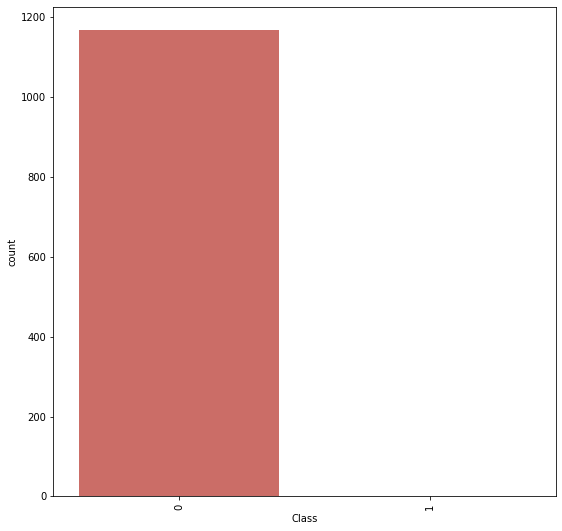

In [17]:
plt.figure(figsize=(9,9))
sns.countplot(data['Class'], data = data, palette = 'hls')
plt.xticks(rotation=90)
plt.show()

In [18]:
import plotly.express as px


In [19]:
fig1 = px.histogram(data, x='Class', color='Class')
fig1.show()

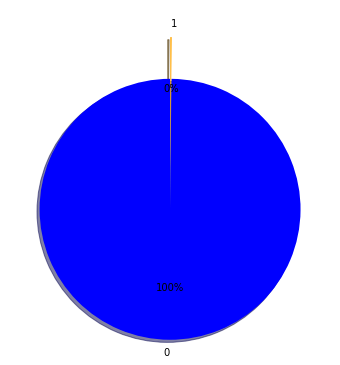

In [21]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(data['Class'].value_counts(), colors = ['blue', 'orange'], labels=[0,1],
        explode = explode, autopct = '%0.0f%%', shadow = 'True',
  startangle = 90)
plt.show()

In [22]:
fig2 = px.pie(values=data['Class'].value_counts(), names= [0,1])
fig2.show()

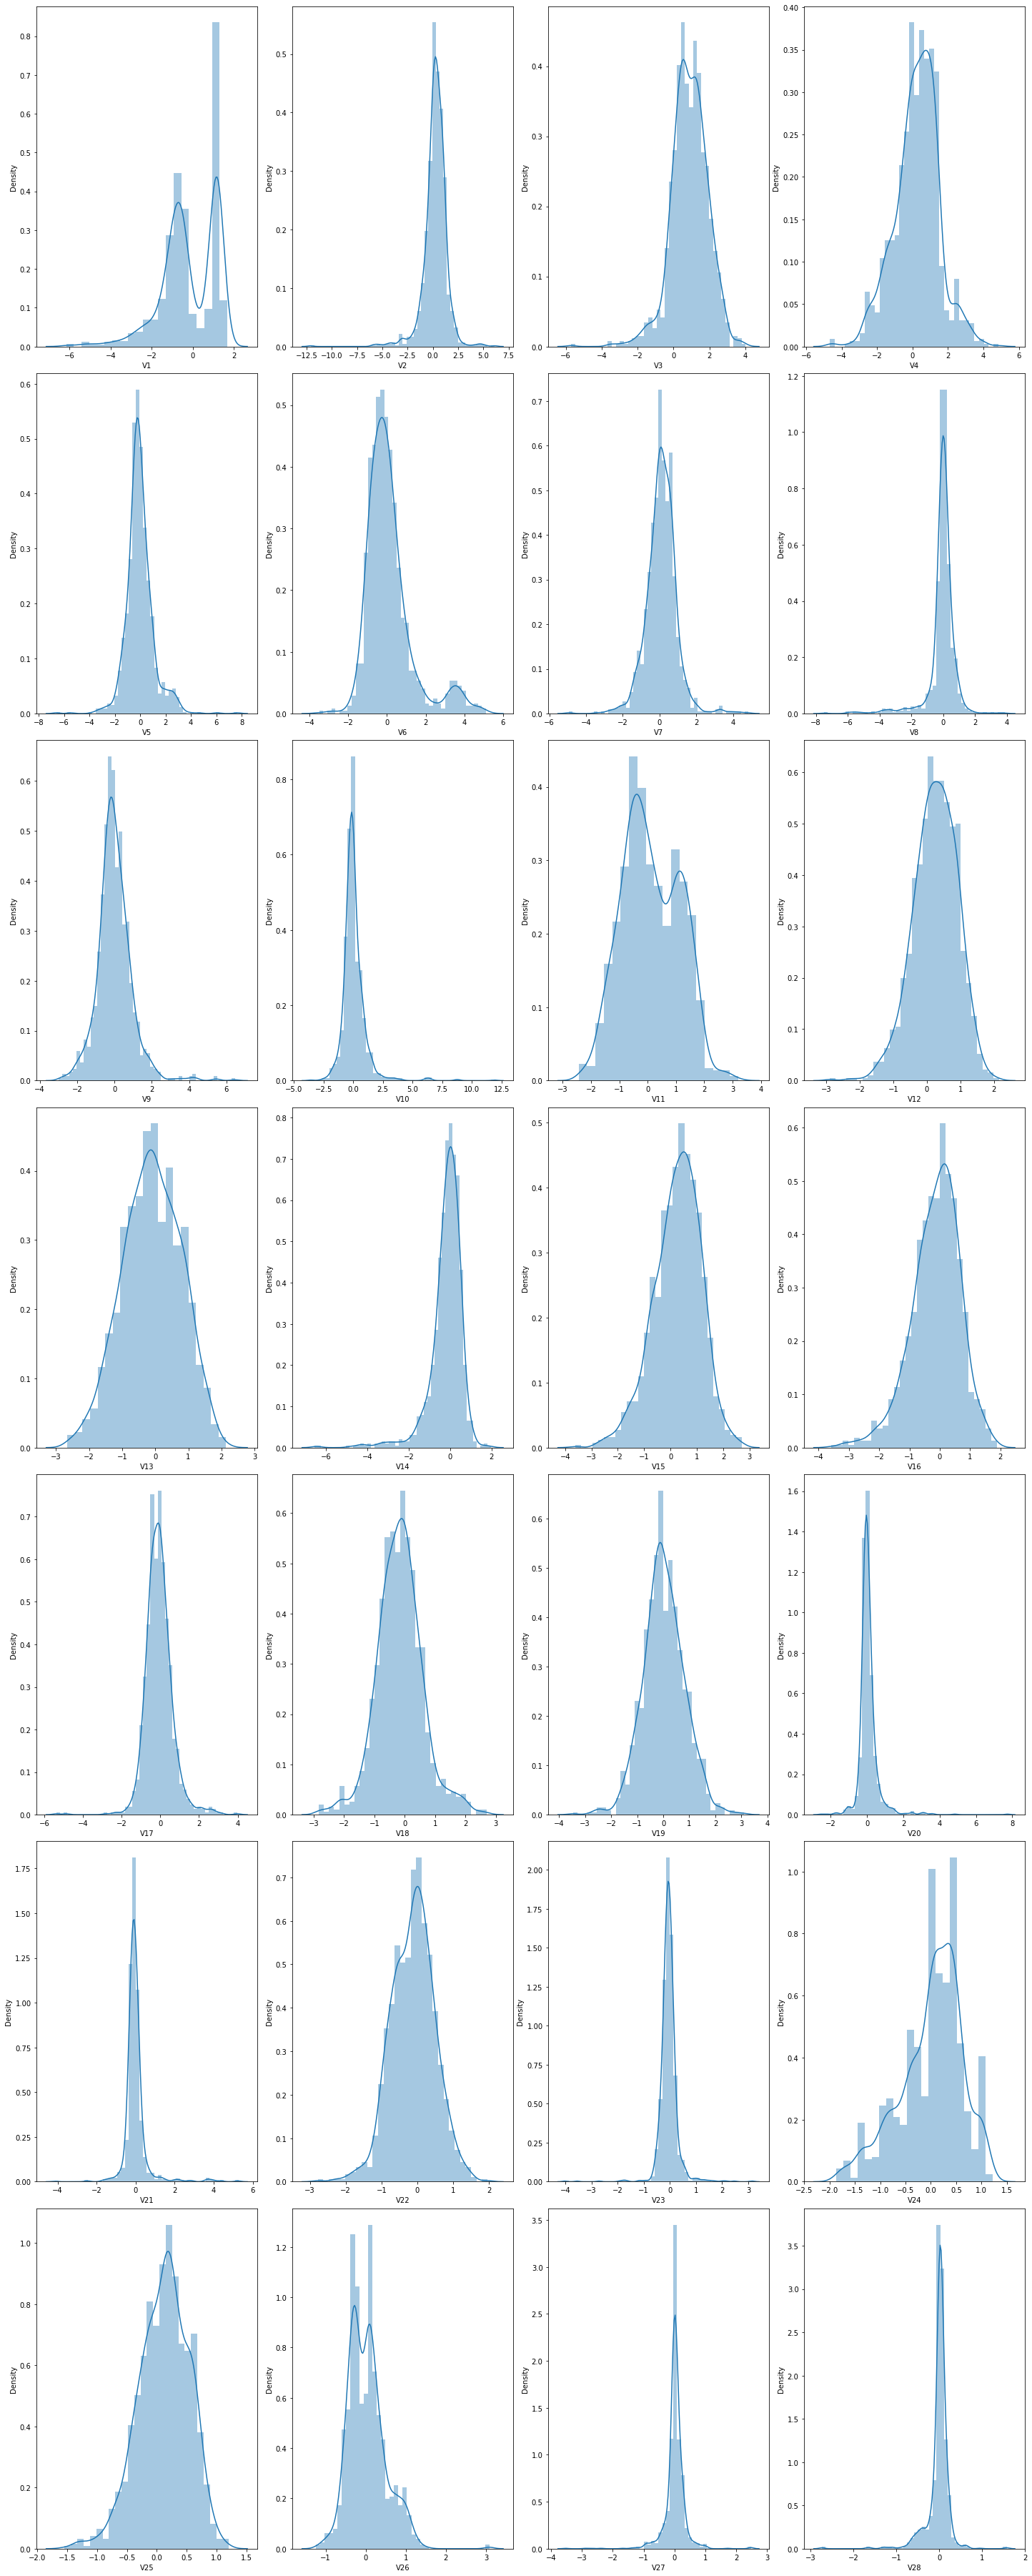

In [24]:
data1 = data.drop(columns=['Time', 'Amount', 'Class'], axis=1)
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20,50))
index = 0
ax = ax.flatten()
for col in data1.columns:
  sns.distplot(data1[col], ax = ax[index])
  index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 0.5)  

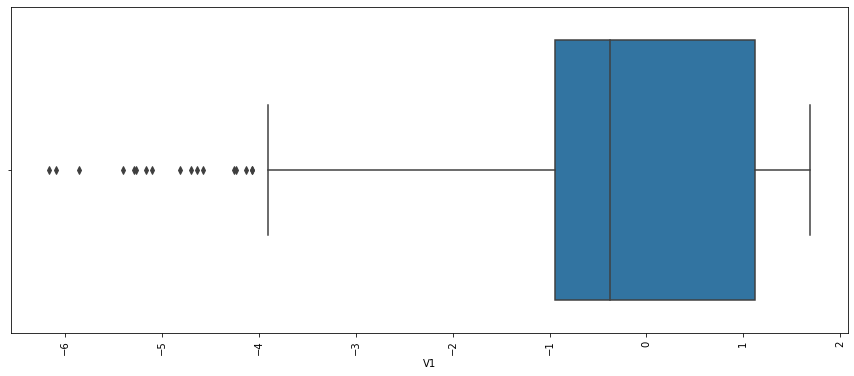

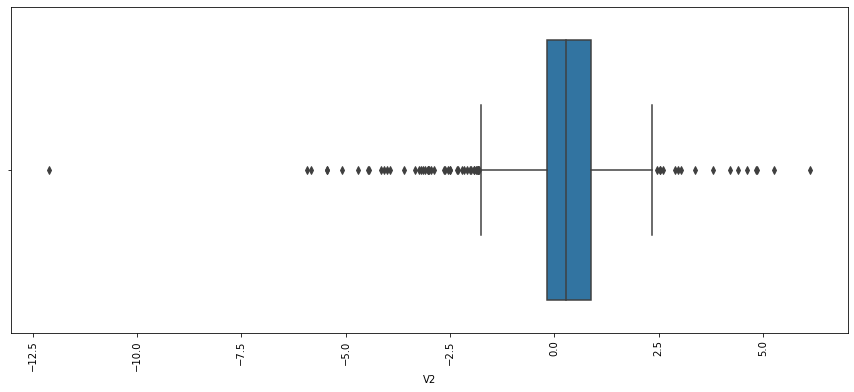

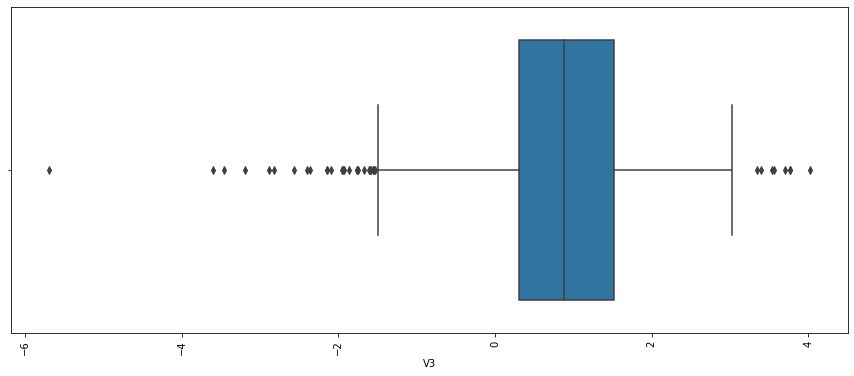

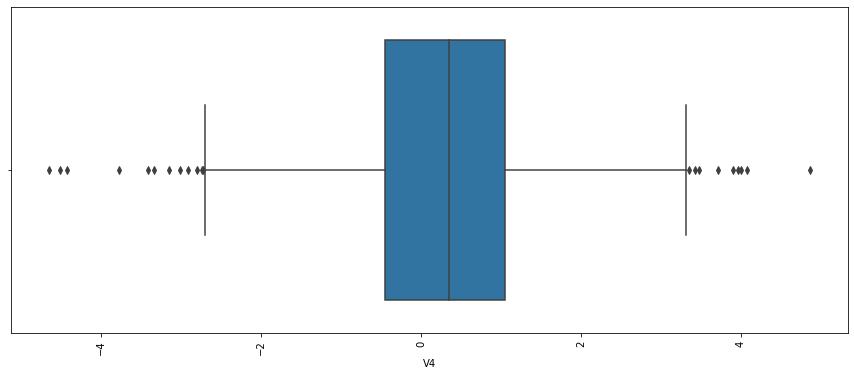

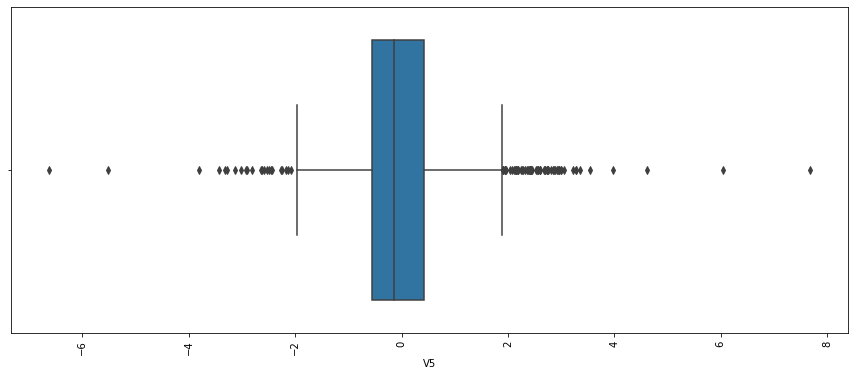

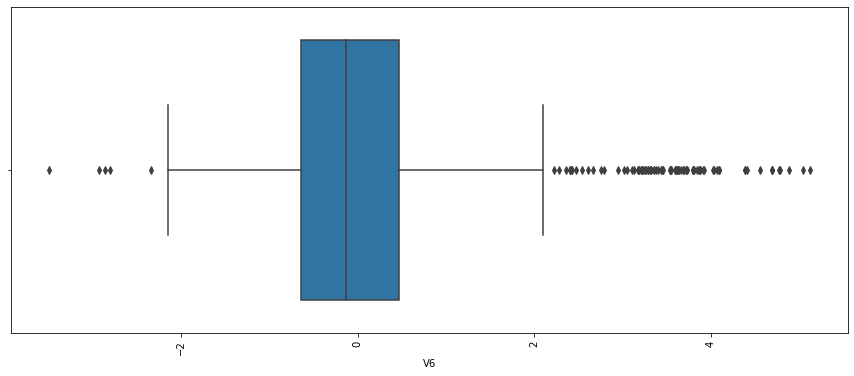

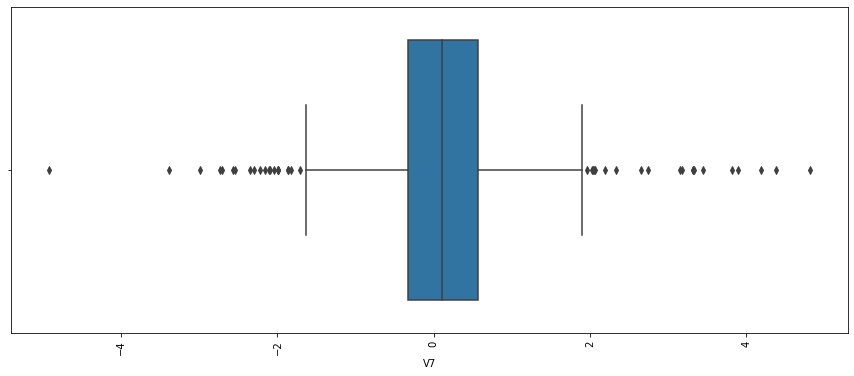

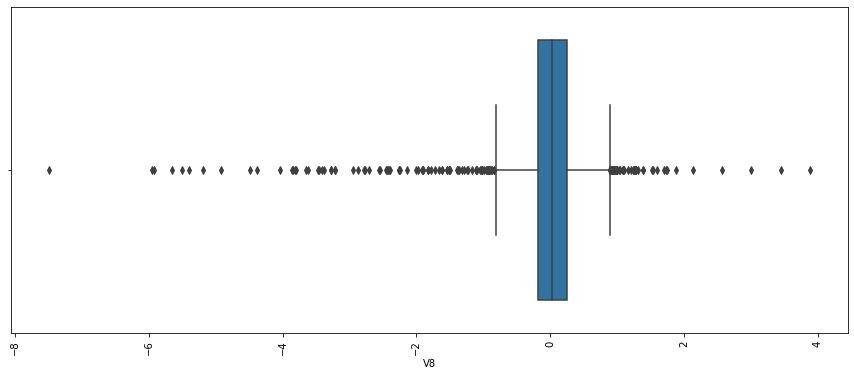

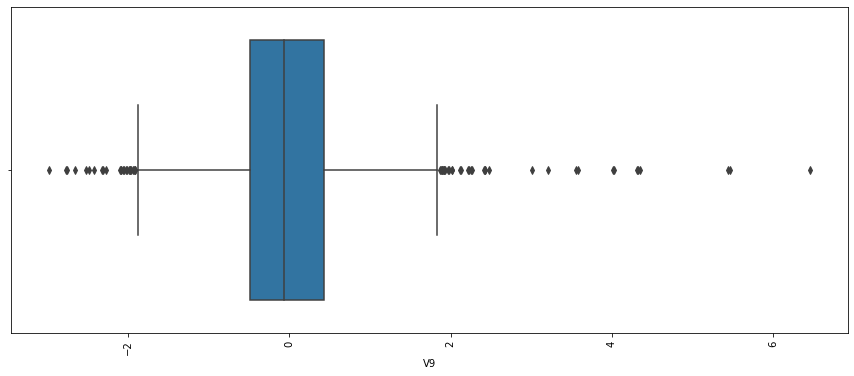

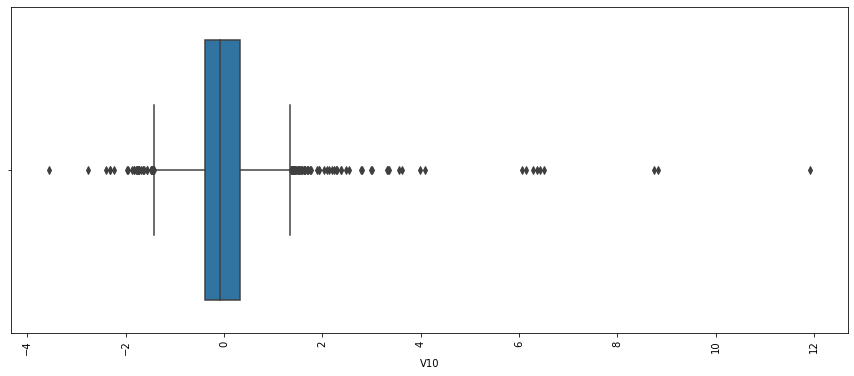

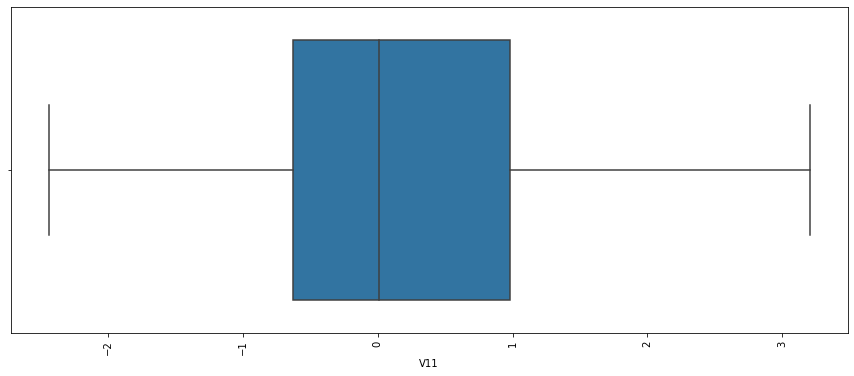

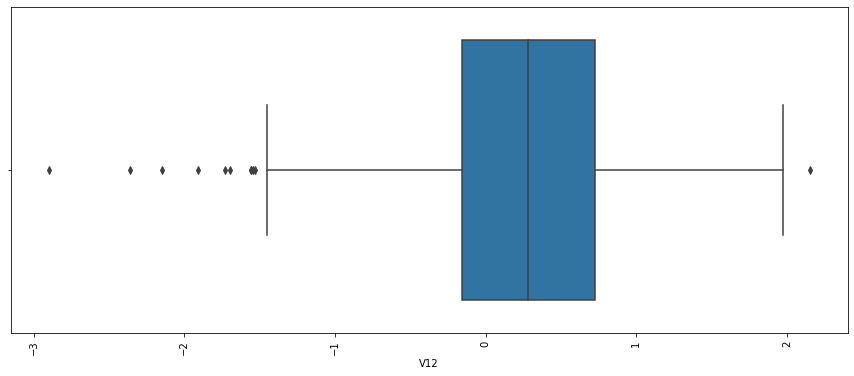

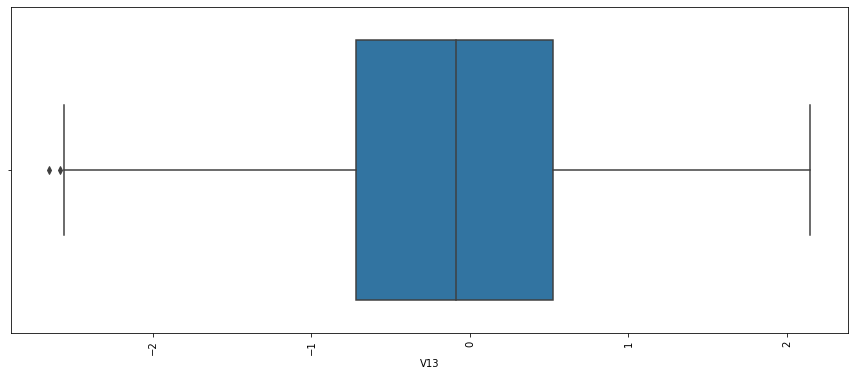

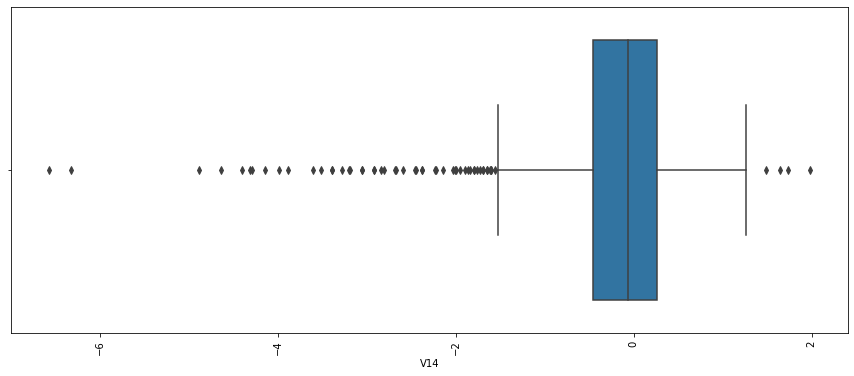

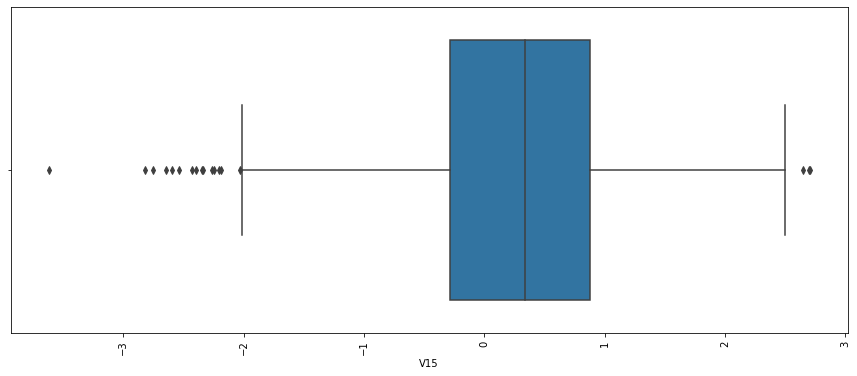

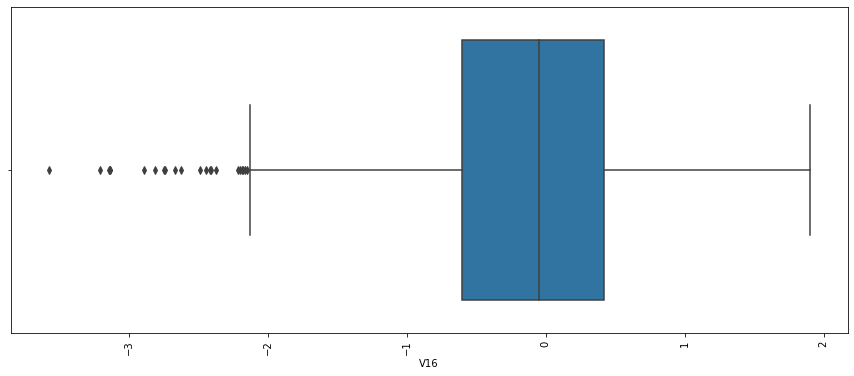

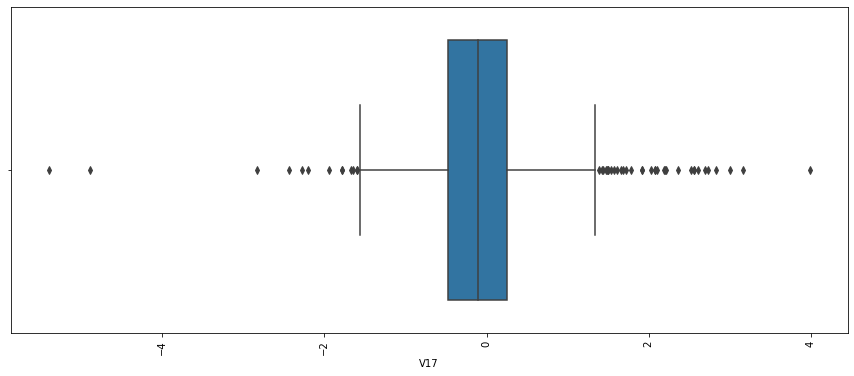

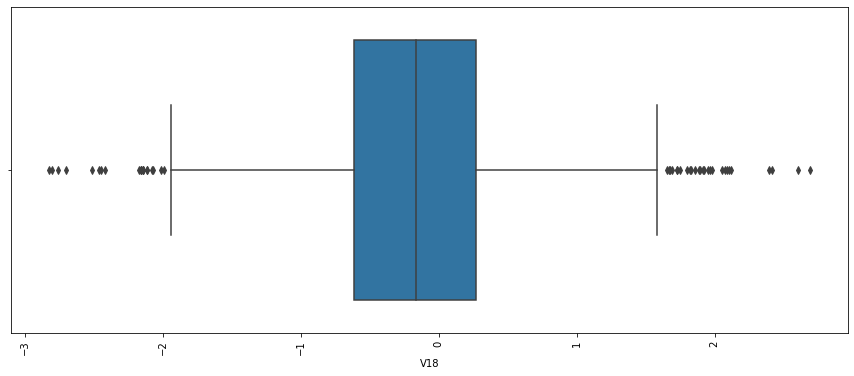

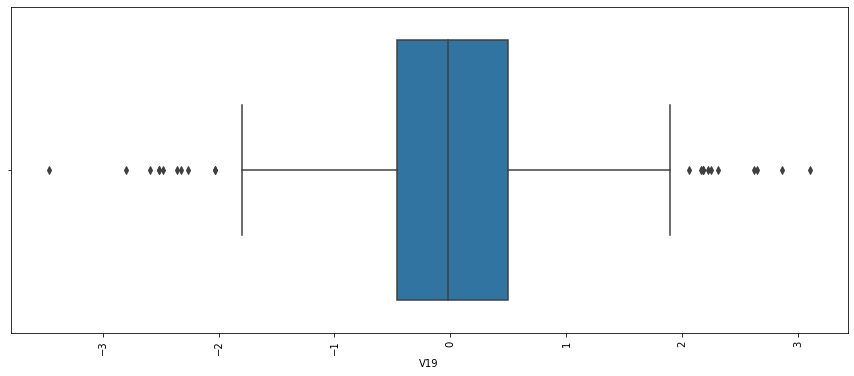

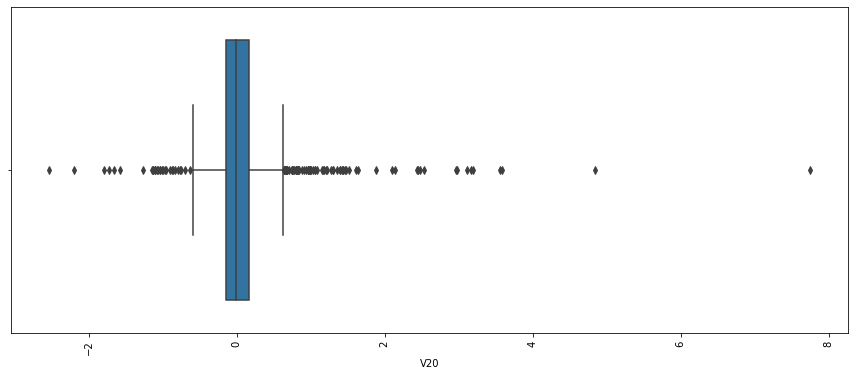

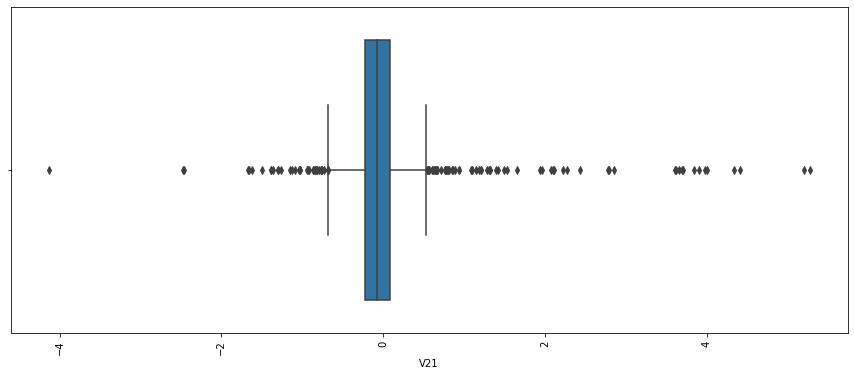

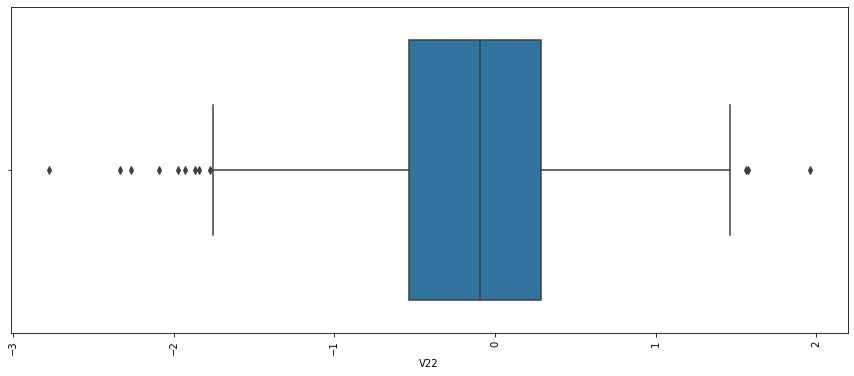

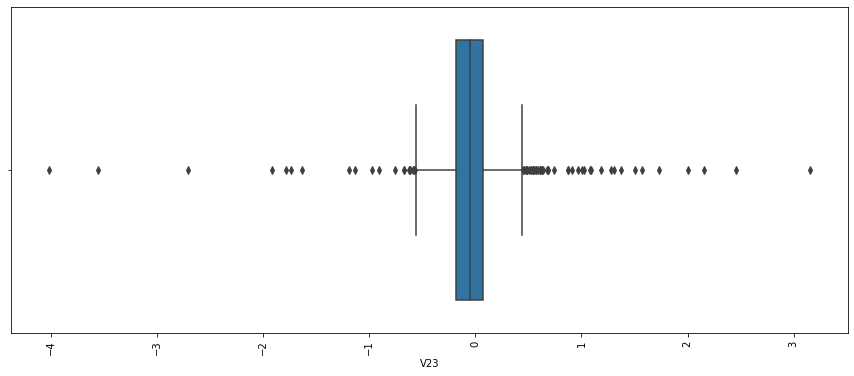

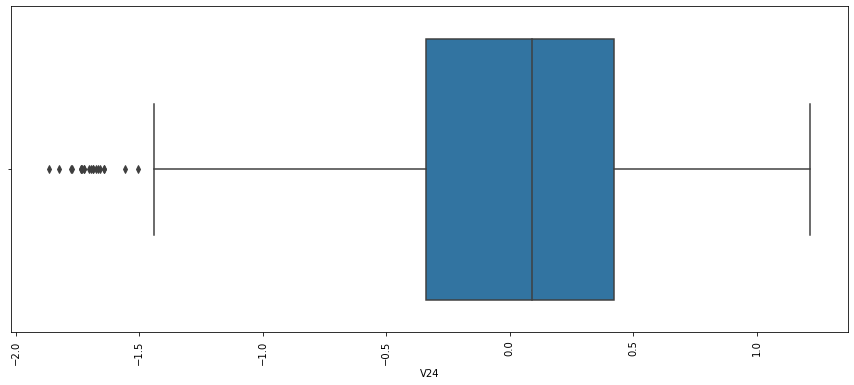

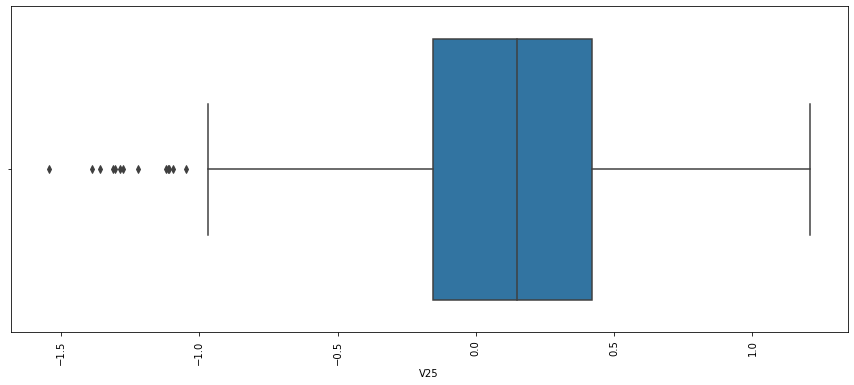

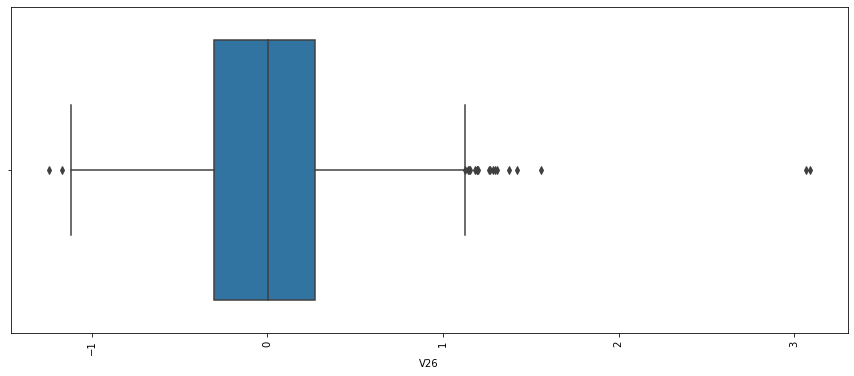

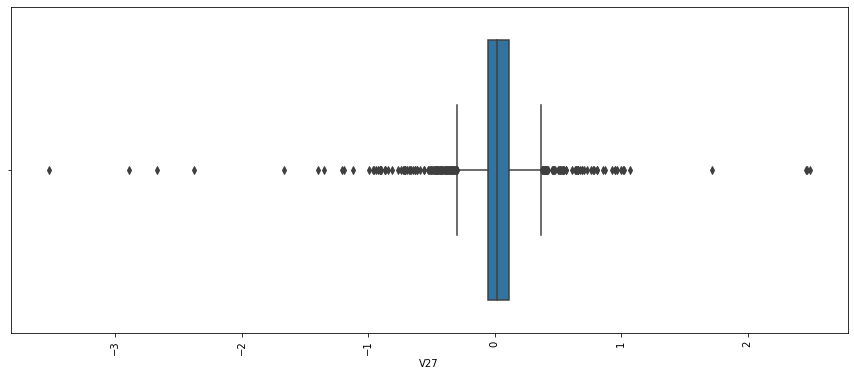

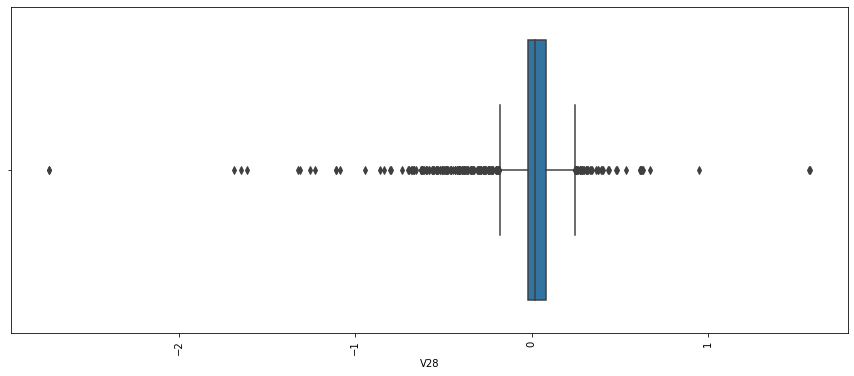

In [25]:
for i in data1.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(data1[i])
  plt.xticks(rotation=90)
  plt.show()

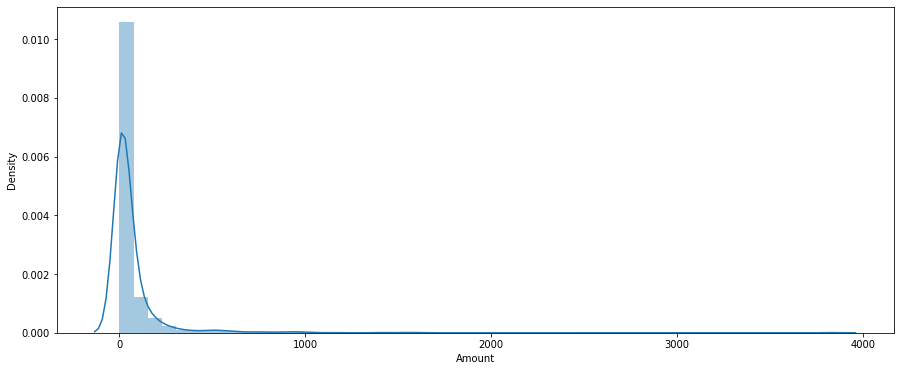

In [27]:
plt.figure(figsize=(15,6))
sns.distplot(data['Amount'])
plt.show()

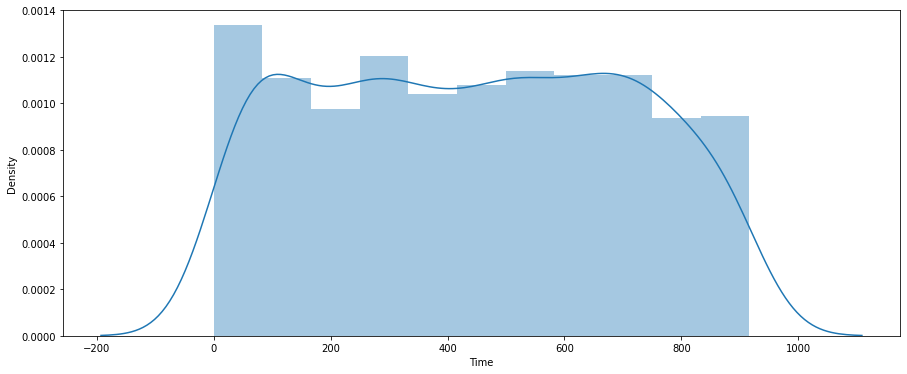

In [28]:
plt.figure(figsize=(15,6))
sns.distplot(data['Time'])
plt.show()

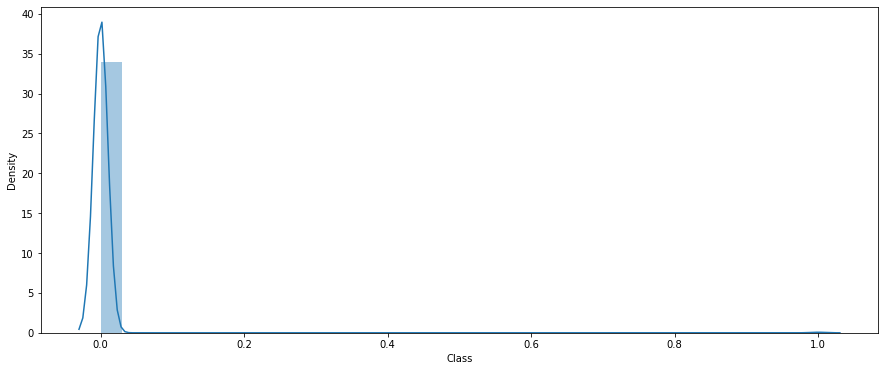

In [29]:
plt.figure(figsize=(15,6))
sns.distplot(data['Class'])
plt.show()

In [30]:
x = data.drop(columns='Class', axis=1)
y = data['Class']

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_scaler = sc.fit_transform(x)

x_scaler[-1]

array([ 1.79397658, -0.93266365,  1.50370129, -0.44417727, -0.52191646,
        0.29588348, -0.58376997,  0.69188357,  0.07455029,  0.56368441,
        0.93524784, -0.84571087, -0.3190015 ,  1.17749893, -0.95660319,
        0.78928123,  0.77728645, -0.4304276 ,  0.17883876,  0.05748165,
        1.35837769, -0.74408759, -1.29186636, -0.06804346, -0.85027103,
        0.27928547,  0.24129683,  2.17952488,  1.71316014, -0.33403201])

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.33, random_state = 42, stratify = y)


In [33]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train, y_train)


LogisticRegression()

In [34]:
y_pred = lg.predict(x_test)

In [36]:
print('Training Accuracy:', lg.score(x_train, y_train))
print('Testing Accuracy:', lg.score(x_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9948186528497409


In [37]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       0.00      0.00      0.00         1

    accuracy                           0.99       386
   macro avg       0.50      0.50      0.50       386
weighted avg       0.99      0.99      0.99       386

